# **Initial Visualisation**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
# Load the dataset
df = pd.read_csv('data/cleaned_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Over weight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Over weight
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,Obesity
1333,18,female,31.920,0,no,northeast,2205.98080,Obesity
1334,18,female,36.850,0,no,southeast,1629.83350,Obesity
1335,21,female,25.800,0,no,southwest,2007.94500,Over weight


### **1. checking the disribution of the 'charges' column**

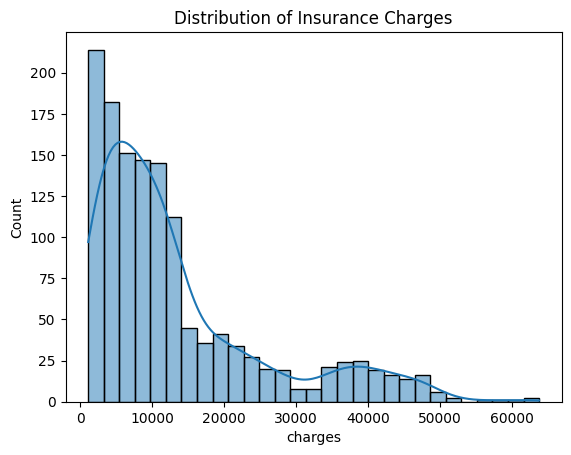

In [57]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

### **2. Checking how Does BMI (or BMI Category) Affect Insurance Charges**

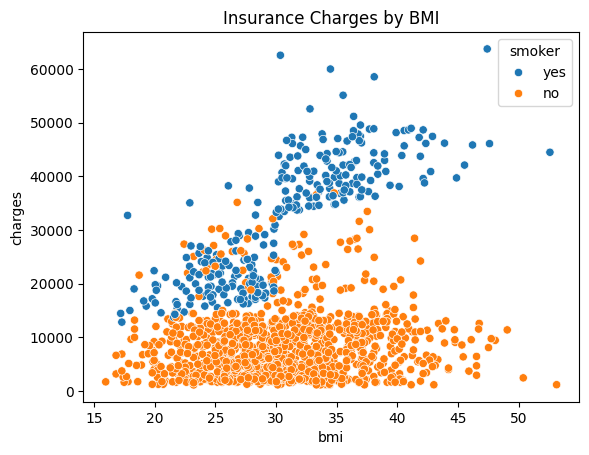

In [59]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Insurance Charges by BMI')
plt.show()

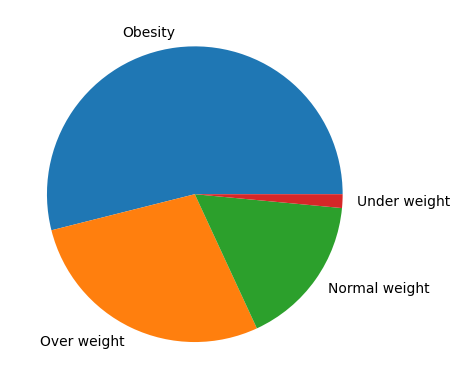

In [54]:
# Pie hart of bmi_categories column
bmi_category_counts= df['bmi_category'].value_counts()
plt.pie(x=bmi_category_counts, labels=bmi_category_counts.index)
plt.show()

    bmi_category       charges
0  Normal weight  10379.499732
1        Obesity  15467.835601
2    Over weight  11017.601623
3   Under weight   8852.200585


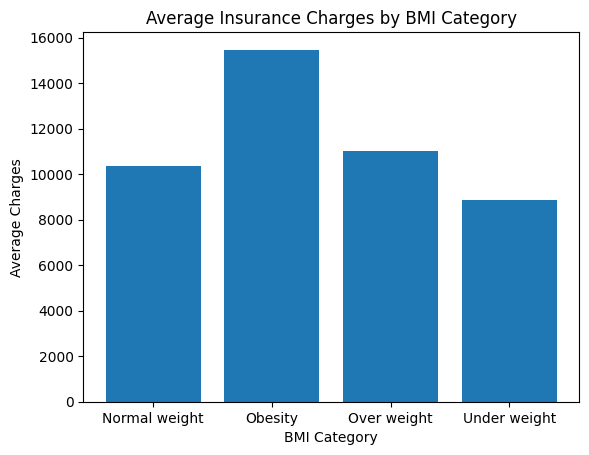

In [48]:
# Calculate average charges by BMI category
bmi_charges = df.groupby('bmi_category')['charges'].mean().reset_index()
print(bmi_charges)
plt.bar(x= bmi_charges['bmi_category'].astype(str), height=bmi_charges['charges'])
plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.show()

###  Insight

From the bar chart, i observe:

- Obese individuals tend to have the highest average insurance charges, likely due to associated health risks.
- Underweight and normal BMI individuals generally incur lower charges.
- There's a clear increasing trend in charges from normal → overweight → obese, showing that higher BMI correlates with higher medical costs.

### **3. Cheking how Do Insurance Charges Vary with Age**

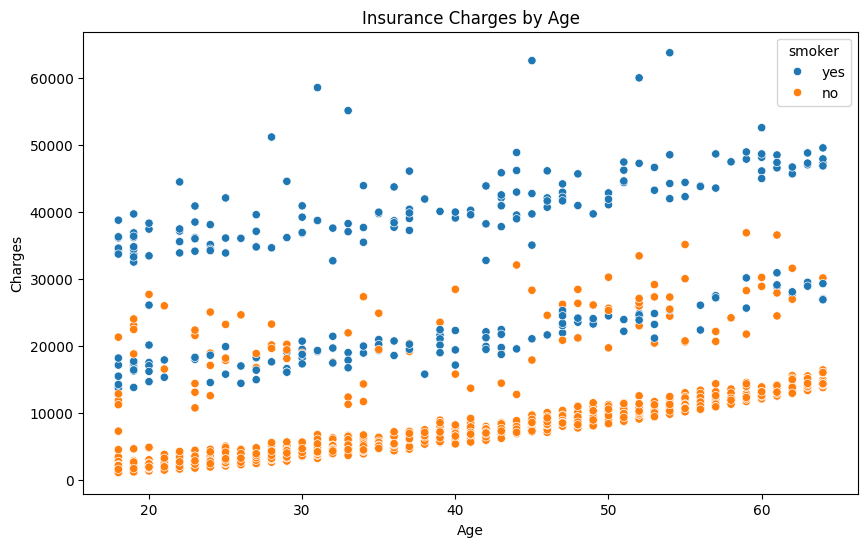

In [ ]:
# Cheking average insurance charges by age using seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

- Insurance charges generally increase with age, especially for older individuals.
- Smokers (shown in red) tend to have significantly higher charges across all age groups.
- Younger non-smokers often have ower and less variable costs, whereas older smokers may have extremely high insurance charges.

### **Checking is there a difference in charges by region**

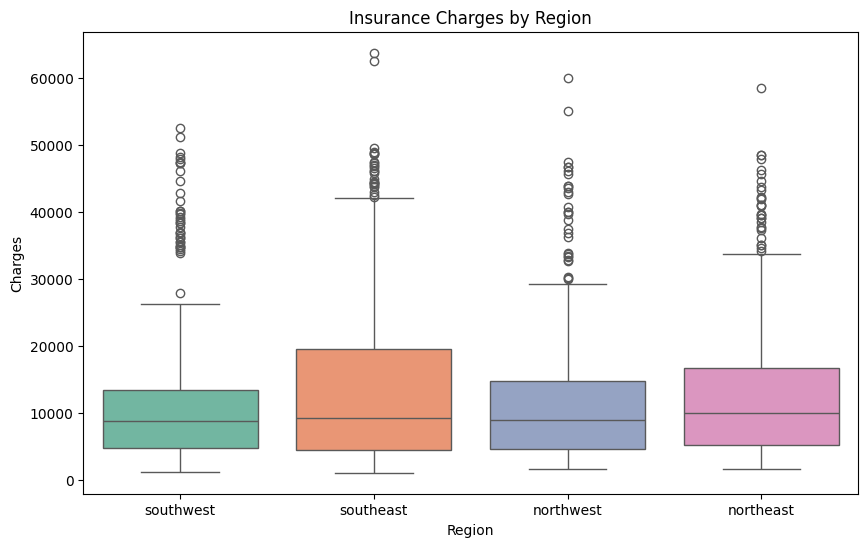

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='region', y='charges', palette='Set2', hue='region')
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

## Insight

From the boxplot,
* i can say, The Southeast region appeared to have a higher median insurance cost and more outliers compared to other regions. 
* This suggests that regional factors might influence insurance pricing — potentially due to demographics, lifestyle, or healthcare costs in different areas